In [ ]:
import pandas as pd
import numpy as np
import random

# Define symptom columns
symptoms = [
    "chest_pain", "shortness_of_breath", "unconsciousness", "bleeding",
    "confusion", "weakness", "seizure", "trauma", "dizziness", "cyanosis"
]

# Define 8 diagnoses (classes)
diagnoses = [
    "Cardiac Arrest", "Seizure/Post-Seizure", "Stroke", "Shock/Collapse",
    "Major Trauma/Bleeding", "Heart Attack",
    "Severe Respiratory Distress", "Fainting/Syncope"
]

# Define logical symptom rules for each diagnosis
rules = {
    "Cardiac Arrest": {"chest_pain":1, "shortness_of_breath":1, "unconsciousness":1, "cyanosis":1},
    "Seizure/Post-Seizure": {"seizure":1, "confusion":1, "unconsciousness":0},
    "Stroke": {"confusion":1, "weakness":1, "dizziness":1},
    "Shock/Collapse": {"weakness":1, "dizziness":1, "shortness_of_breath":1},
    "Major Trauma/Bleeding": {"trauma":1, "bleeding":1},
    "Heart Attack": {"chest_pain":1, "shortness_of_breath":1, "dizziness":1},
    "Severe Respiratory Distress": {"shortness_of_breath":1, "cyanosis":1},
    "Fainting/Syncope": {"dizziness":1, "weakness":1, "unconsciousness":1}
}

# Generate 50 samples per diagnosis
records = []

for diagnosis, rule in rules.items():
    for _ in range(50):
        entry = {}
        for symptom in symptoms:
            # Follow rule if defined, otherwise randomize lightly
            if symptom in rule:
                entry[symptom] = rule[symptom]
            else:
                # small random noise for variability
                entry[symptom] = random.choice([0, 1]) if random.random() < 0.2 else 0
        entry["diagnosis"] = diagnosis
        records.append(entry)

# Create DataFrame
df = pd.DataFrame(records)

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display results
print(df["diagnosis"].value_counts())
df.head()


diagnosis
Major Trauma/Bleeding          50
Heart Attack                   50
Cardiac Arrest                 50
Seizure/Post-Seizure           50
Severe Respiratory Distress    50
Stroke                         50
Fainting/Syncope               50
Shock/Collapse                 50
Name: count, dtype: int64


,chest_pain,shortness_of_breath,unconsciousness,bleeding,confusion,weakness,seizure,trauma,dizziness,cyanosis,diagnosis
0,0,0,0,1,0,0,0,1,0,0,Major Trauma/Bleeding
1,1,1,0,0,0,0,0,0,1,1,Heart Attack
2,1,1,1,0,0,0,0,0,1,1,Cardiac Arrest
3,0,0,0,1,0,0,0,1,0,0,Major Trauma/Bleeding
4,0,0,0,0,1,0,1,0,0,0,Seizure/Post-Seizure


In [ ]:
print(df["diagnosis"].value_counts())


diagnosis
Major Trauma/Bleeding          50
Heart Attack                   50
Cardiac Arrest                 50
Seizure/Post-Seizure           50
Severe Respiratory Distress    50
Stroke                         50
Fainting/Syncope               50
Shock/Collapse                 50
Name: count, dtype: int64


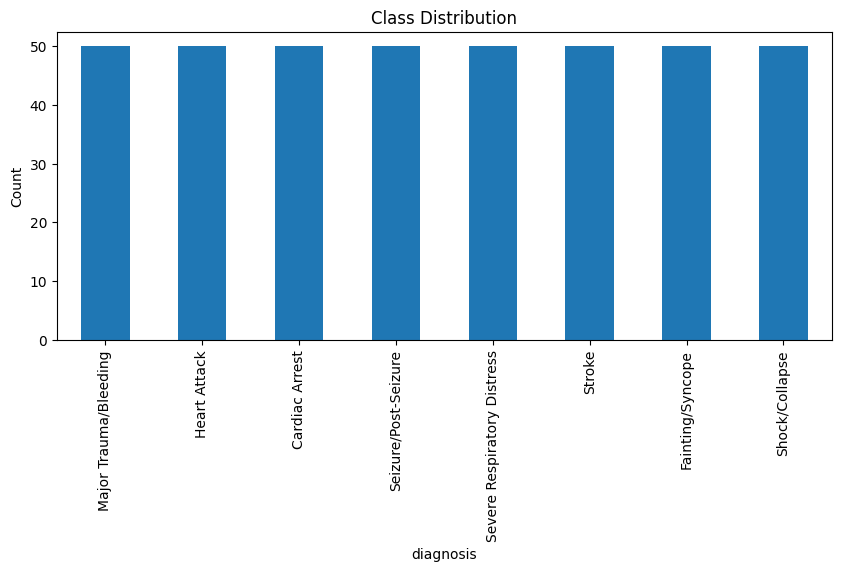

In [ ]:
import matplotlib.pyplot as plt

df["diagnosis"].value_counts().plot(kind="bar", title="Class Distribution", figsize=(10,4))
plt.ylabel("Count")
plt.show()


In [ ]:
df.to_csv("balanced_emergency_triage_dataset.csv", index=False)
print("✅ Dataset saved successfully.")


✅ Dataset saved successfully.


In [ ]:
df.shape

(400, 11)